### To predict the price of car using linear regression 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('car data.xls')

#### top5 row of the dataset

In [3]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### check last 5 rows of the dataset

In [4]:
data.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


### shape of the dataset

In [5]:
print("number of rows are",data.shape[0])
print("number of columns are",data.shape[1])

number of rows are 301
number of columns are 9


### get information of the datset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### null values in the dataset


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Get overall statistics about the dataset (only numerical columns)

In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### data Preprocessing

In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
import datetime

In [11]:
# to find the age of the car

date_time=datetime.datetime.now()
data['Age']=date_time.year-data['Year'] 


In [12]:
data.drop(['Year'],axis=1,inplace=True)

In [13]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,15
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,12


### outlier removal

<Axes: ylabel='Selling_Price'>

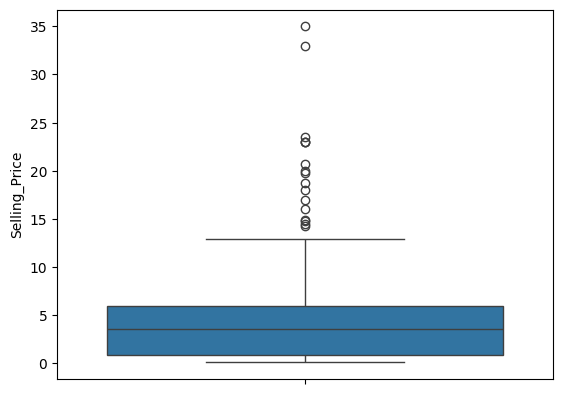

In [14]:
sns.boxplot(data['Selling_Price'])

In [15]:
# remove outliers
q1=data['Selling_Price'].quantile(0.25)
q3=data['Selling_Price'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
data=data[(data['Selling_Price']<upper) & (data['Selling_Price']>lower)]
data.shape


(284, 9)

<Axes: ylabel='Selling_Price'>

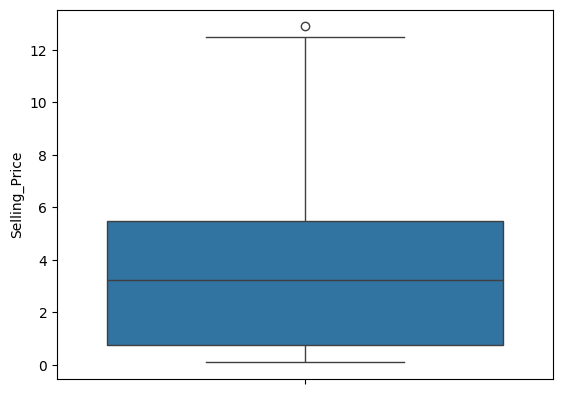

In [16]:
sns.boxplot(data['Selling_Price'])

### Encoding the categorical values

In [17]:
data.head(4)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,15


In [18]:
# as 'Car_Name' is not useful for prediction we will drop it
data.drop(['Car_Name'],axis=1,inplace=True)

### Perform EDA

In [19]:
data.sample(7)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
12,7.50,9.94,15000,Petrol,Dealer,Automatic,0,11
259,3.90,7.00,36054,Petrol,Dealer,Manual,0,12
187,0.25,0.51,32000,Petrol,Individual,Manual,0,13
10,2.85,3.60,2135,Petrol,Dealer,Manual,0,9
17,7.75,10.79,43000,Diesel,Dealer,Manual,0,10
37,0.35,2.28,127000,Petrol,Individual,Manual,0,23
160,0.45,0.95,24000,Petrol,Individual,Manual,0,15


### Encoding categorical variables

In [20]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    236
Diesel     46
CNG         2
Name: count, dtype: int64

In [21]:
data['Seller_Type'].value_counts()

Seller_Type
Dealer        179
Individual    105
Name: count, dtype: int64

In [22]:
data['Transmission'].value_counts()

Transmission
Manual       257
Automatic     27
Name: count, dtype: int64

In [23]:
data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
data['Seller_Type']=data['Seller_Type'].map({'Dealer':0,'Individual':1})
data['Transmission']=data['Transmission'].map({'Manual':0,'Automatic':1})

In [24]:
data.sample(7)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
45,7.50,12.04,15000,0,0,1,0,12
48,5.80,7.71,25870,0,0,0,0,11
278,6.00,8.40,4000,0,0,0,0,10
17,7.75,10.79,43000,1,0,0,0,10
44,1.25,2.69,50000,0,0,0,0,14
110,1.20,1.78,6000,0,1,0,0,10
253,7.20,9.90,48000,1,0,0,0,12


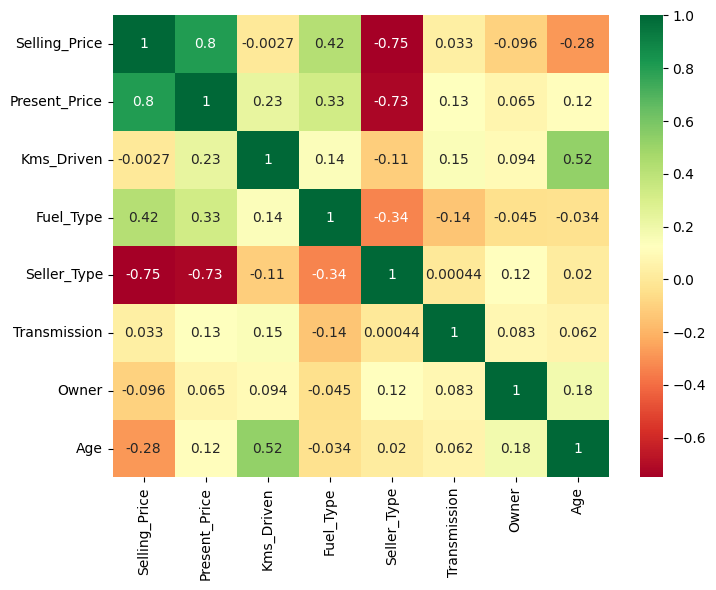

In [25]:
# correlation matrix
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(8,6))
# heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()


In [26]:
# encoding categorical features using one hot encoding in transformer way
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


Features=data.drop(['Selling_Price'],axis=1)
target=data['Selling_Price']



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2, random_state=42)



In [27]:
x_train.sample(5)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
297,5.90,60000,0,0,0,0,11
119,1.90,5400,0,1,0,0,13
29,10.38,45000,1,0,0,0,11
141,0.80,20000,0,1,0,0,10
275,13.60,30753,0,0,1,0,10


In [28]:
# shape of x_train and x_test
print(" shape of the x_train is ",x_train.shape)
print(" shape of the x_test is ",x_test.shape)





 shape of the x_train is  (227, 7)
 shape of the x_test is  (57, 7)


## Use use columsTransfromer and pipeline

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline



preprocessor=ColumnTransformer(transformers=[
    ('num',StandardScaler(),[0,1,2,3,4,5])
    ], remainder='passthrough')




model=Pipeline(steps=[
    ('preprocessor', preprocessor),
    (
        #'Linear_regression',LinearRegression(),
        'Gradient_Boosting',GradientBoostingRegressor(),
     )
])




In [30]:
from sklearn import set_config
set_config(display='diagram')
model.fit(x_train,y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('Gradient_Boosting', GradientBoostingRegressor())])

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

model.fit(x_train,y_train)
y_pred=model.predict(x_test)


score=r2_score(y_test,y_pred)
print("R2 score after scaling is:",score)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean absolute error is:",mae)
print("Mean squared error is:",mse)


R2 score after scaling is: 0.9525247060920781
Mean absolute error is: 0.49020979496095746
Mean squared error is: 0.44586704144483397


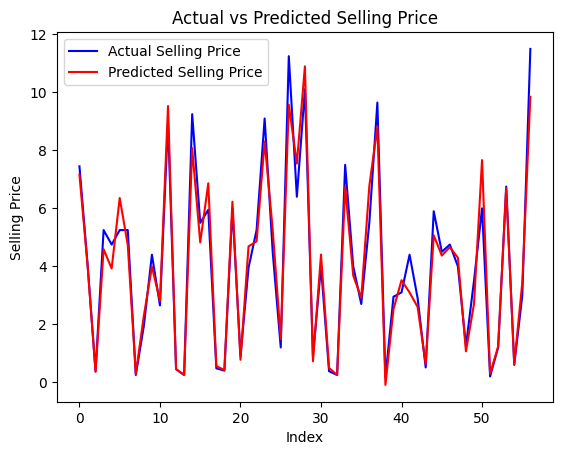

In [32]:
# plot for accuracy 

plt.plot(y_test.values, label='Actual Selling Price', color='b')
plt.plot(y_pred, label='Predicted Selling Price', color='r')
plt.xlabel("Index")
plt.ylabel("Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.legend()
plt.show()


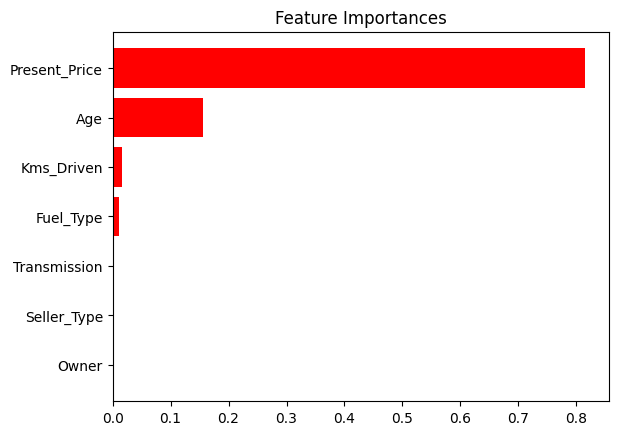

In [33]:
# plot feature importance
feature_names=Features.columns
importances=model.named_steps['Gradient_Boosting'].feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.show()


In [34]:
# save the model
import joblib
joblib.dump(model,"car_price_model.pkl")



['car_price_model.pkl']